In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

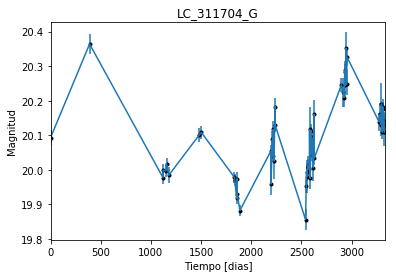

In [2]:
data = np.genfromtxt('LC_311704_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_311704_G')
plt.savefig("LC_311704_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

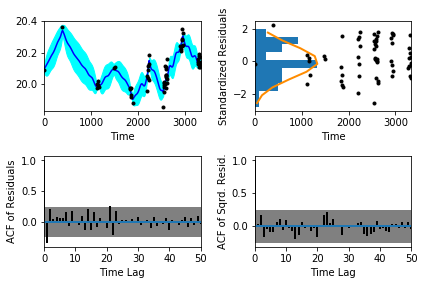

In [5]:
sample.assess_fit()

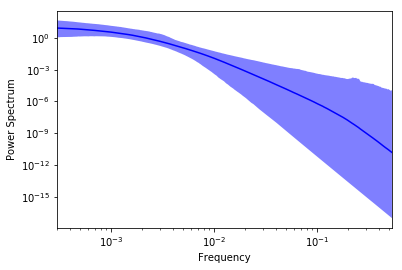

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

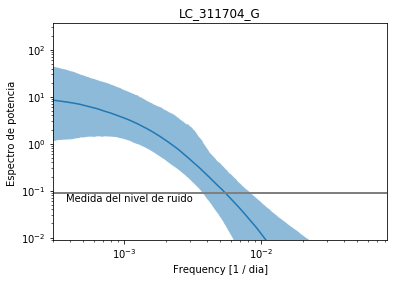

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_311704_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_311704_G')

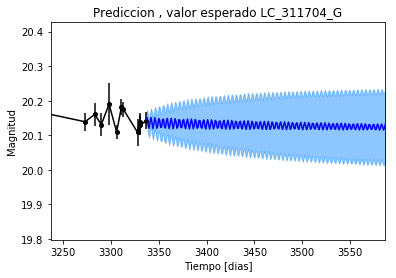

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_311704_G')

Text(0.5,1,'Prediccion, Caminos simulados_LC_311704_G')

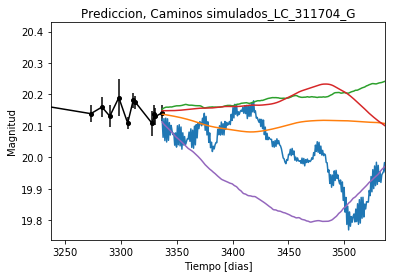

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_311704_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


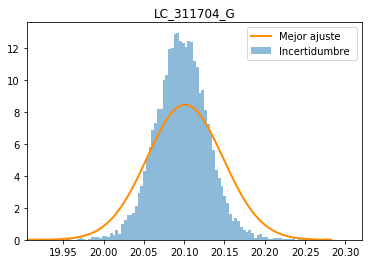

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_311704_G')
plt.savefig("Mejor_ajuste_LC_311704_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_311704_G')

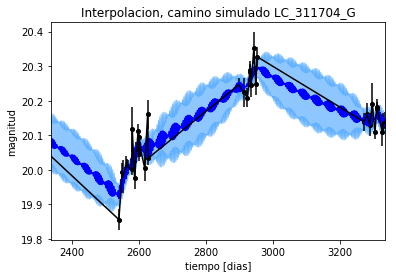

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_311704_G')

Text(0.5,1,'Interpolacion, camino simulado LC_311704_G')

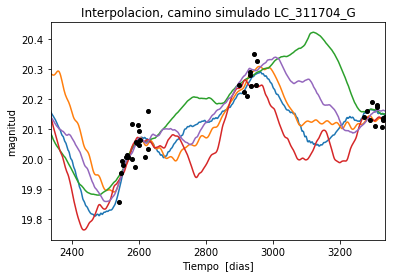

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_311704_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 729.671870294
Median: 0.0129198997299
Standard deviation: 0.220294867946
68% credibility interval: [ 0.00118356  0.24662307]
95% credibility interval: [  3.60780526e-04   8.53603776e-01]
99% credibility interval: [  3.14749038e-04   1.01416322e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 368.323598978
Median: 0.00313064261452
Standard deviation: 0.104429592986
68% credibility interval: [ 0.00068825  0.03199495]
95% credibility interval: [ 0.00033535  0.30263115]
99% credibility interval: [  3.07843407e-04   8.53603776e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 561.199790787
Median: 0.017128880289
Standard de

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1450.09808025
Median: 118.548070679
Standard deviation: 1.6353324554
68% credibility interval: [ 116.78194389  119.66685288]
95% credibility interval: [ 114.34244265  120.76918972]
99% credibility interval: [ 112.27378168  121.96416432]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 360.090920804
Median: 0.647546972241
Standard deviation: 2.36118681661
68% credibility interval: [ 0.06181577  4.12276465]
95% credibility interval: [ 0.01805152  8.10911077]
99% credibility interval: [  0.01229552  11.1991435 ]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 761.08068198
Median: 1.03998727677
Standard deviation: 10.6276603045
68% credibility interval: [  0.03554197  12.70864512]
95% credibility interval: [  1.32082909e

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 3821.50746518
Median: 5.13065893251e-32
Standard deviation: 2.4427997701e+24
68% credibility interval: [  8.79630324e-79   2.16925183e-08]
95% credibility interval: [  3.33629414e-91   1.00753272e+09]
99% credibility interval: [  9.21622246e-106   3.63682412e+018]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2530.07003113
Median: 20.1009211432
Standard deviation: 0.0699349877257
68% credibility interval: [ 20.04557416  20.16457454]
95% credibility interval: [ 19.96768075  20.24548146]
99% credibility interval: [ 19.88573346  20.31736361]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 481.749718364
Median: 0.0210645369862
Standard deviation: 0.277058457739
68% credibility interval: [ 0.          0.49517562]
95% credibility interval: [ 0.          0.93142278]
99% credibility interval: [ 0.          1.03373697]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 481.749718364
Median: 0.0210645369862
Standard deviation: 0.277058457739
68% credibility interval: [ 0.          0.49517562]
95% credibility interval: [ 0.          0.93142278]
99% credibility interval: [ 0.          1.03373697]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 554.653628724
Median: 0.0
Standard deviation: 0.000621158782999
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1450.09808025
Median: 118.548070679
Standard deviation: 1.6353324554
68% credibility interval: [ 116.78194389  119.66685288]
95% credibility interval: [ 114.34244265  120.76918972]
99% credibility interval: [ 112.27378168  121.96416432]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2524.66259169
Median: 0.0230776149138
Standard deviation: 0.0227904167553
68% credibility interval: [ 0.01430753  0.04202062]
95% credibility interval: [ 0.00960089  0.08335876]
99% credibility interval: [ 0.00762059  0.14912608]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1338.75196232
Median: 1.46144089703
Standard deviation: 0.224961909864
68% credibility interval: [ 1.2447241  1.7023836]
95% credibility interval: [ 1.03253201  1.90936233]
99% credibility interval: [ 0.87131174  1.97183367]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 761.338076024
Median: 0.000473641551708
Standard deviation: 0.123753520418
68% credibility interval: [  9.11107872e-06   1.18877780e-02]
95% credibility interval: [  8.31859225e-14   2.34055249e-01]
99% credibility interval: [  2.89013303e-20   9.73951642e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 729.671870294
Median: (-0.081178124153-6.49328529493j)
Standard deviation: 2.22402765728
68% credibility interval: [-1.54957846-5.90568288j -0.00743651-0.04334644j]
95% credibility interval: [ -5.36335070e+00-5.60320708j  -2.26685090e-03-1.12122567j]
99% credibility interval: [ -6.37217544e+00+0.j          -1.97762653e-03-2.02828526j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 368.323598978
Median: (-0.0196704076776+0j)
Standard deviation: 1.86036330566
68% credibility interval: [-0.20103020+0.j         -0.00432442+1.49101626j]
95% credibility interval: [-1.90148763+4.21922224j -0.00210709+0.07755194j]
99% credibility interval: [ -5.36335070e+00+5.60320708j  -1.93423717e-03+0.05223672j]
Posterior summary for param